In [120]:
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time

In [121]:
csv_file = "Alternative_Fuel_Locations.csv"

In [122]:
df = pd.read_csv(csv_file)

In [123]:
df['Federal Agency ID'].isnull().sum()

1524

In [124]:
df.columns

Index(['ID', 'Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'Location'],
      dtype='object')

In [125]:
df['Plus4'].isnull().sum()

1546

In [126]:
df1 = df.drop(columns = ['Intersection Directions','Plus4','Station Phone', 'Groups With Access Code', 'Access Days Time', 'Cards Accepted','BD Blends'])

In [127]:
df2 = df1.drop(columns = ['NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web'])

In [128]:
# Fuel Type Code Count

In [129]:
# Configure the map plot
vacation_plot_1 = df2.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "EsriImagery",
    frame_width = 800,
    frame_height = 600,
    scale = 0.5,
    color = "City")

In [130]:
# Display the map
vacation_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (City)

In [131]:
ftc = df2["Fuel Type Code"].value_counts()
ftc

ELEC    1186
E85      250
LPG       49
CNG       35
BD        24
LNG        2
Name: Fuel Type Code, dtype: int64

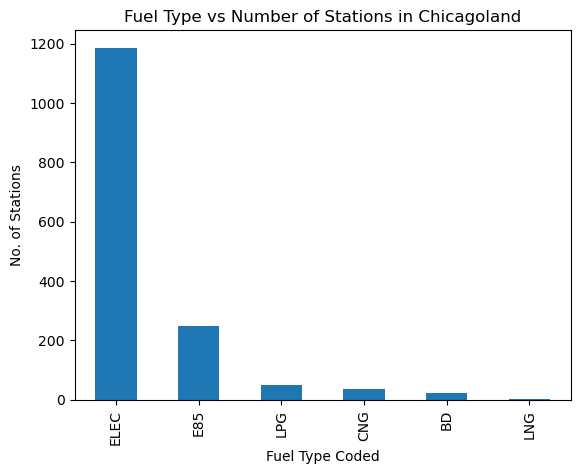

In [132]:
ftc.plot(kind = 'bar')
plt.xlabel("Fuel Type Coded")
plt.ylabel("No. of Stations")
plt.title("Fuel Type vs Number of Stations in Chicagoland")
plt.show()

In [140]:
df2.columns

Index(['ID', 'Fuel Type Code', 'Station Name', 'Street Address', 'City',
       'State', 'ZIP', 'Status Code', 'Expected Date', 'Geocode Status',
       'Latitude', 'Longitude', 'Date Last Confirmed', 'Updated At',
       'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name',
       'Open Date', 'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'Location', 'year'],
      dtype='object')

In [141]:
df2

,ID,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Status Code,Expected Date,Geocode Status,...,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,Location,year
0,73389,ELEC,ComEd,2 Lincoln Center,Oakbrook Terrace,IL,60181,E,NaN,200-9,...,T,NaN,NaN,2013-11-12,NaN,NaN,NaN,NaN,"(41.845827, -87.985467)",2013.0
1,152341,ELEC,University of Illinois - 915 S Paulina St,915 S Paulina St,Chicago,IL,60612,E,NaN,GPS,...,NaN,NaN,NaN,2020-01-10,NaN,NaN,NaN,NaN,"(41.864575, -87.645374)",2020.0
2,193397,ELEC,OIC PARKING OIC STATION 1,10255 W Higgins Rd,Rosemont,IL,60018,E,NaN,GPS,...,NaN,NaN,NaN,2021-07-31,NaN,NaN,NaN,NaN,"(41.995438, -87.882454)",2021.0
3,200330,E85,Casey's General Store,311 S Kinzie Ave,Bradley,IL,60915,E,NaN,200-9,...,P,NaN,NaN,2021-11-01,NaN,NaN,NaN,False,"(41.140532, -87.851305)",2021.0
4,212968,ELEC,MOTORWERKS1475 EV2 MERCEDES,1475 S Barrington Rd,Barrington,IL,60010,E,NaN,GPS,...,NaN,NaN,NaN,2022-03-27,NaN,NaN,NaN,NaN,"(42.129171, -88.134755)",2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,186148,ELEC,NORTH + VINE STATION 1,633 W. North Ave,Chicago,IL,60610,T,11/20/2022,GPS,...,NaN,NaN,NaN,2021-03-13,NaN,NaN,NaN,NaN,"(41.910583, -87.64479)",2021.0
1542,46811,ELEC,Jim M'Lady Nissan,5656 Northwest Hwy,Crystal Lake,IL,60014,E,NaN,200-9,...,P,NaN,NaN,2012-01-31,NaN,NaN,NaN,NaN,"(42.226647, -88.306745)",2012.0
1543,202797,ELEC,INTERPARK 181N DEARBORN 1,181 N Dearborn St,Chicago,IL,60601,E,NaN,GPS,...,NaN,NaN,NaN,2021-12-18,NaN,NaN,NaN,NaN,"(41.885269, -87.629082)",2021.0
1544,237488,ELEC,COMED LIB-E-SE2,1500 Franklin Blvd,Libertyville,IL,60048,E,NaN,GPS,...,NaN,NaN,NaN,2022-12-08,NaN,NaN,NaN,NaN,"(42.301132, -88.00695)",2022.0


In [147]:
data_year = df2['year'].value_counts()
data_year

2022.0    416
2021.0    282
2020.0    108
2019.0    105
2018.0     98
2017.0     81
2012.0     73
2015.0     67
2023.0     65
2016.0     63
2014.0     55
2011.0     29
2013.0     28
2008.0     15
2007.0     13
2010.0     13
2000.0     10
2005.0      7
2009.0      5
2002.0      4
2001.0      3
2006.0      2
1999.0      1
Name: year, dtype: int64

AttributeError: 'Series' object has no attribute 'show'

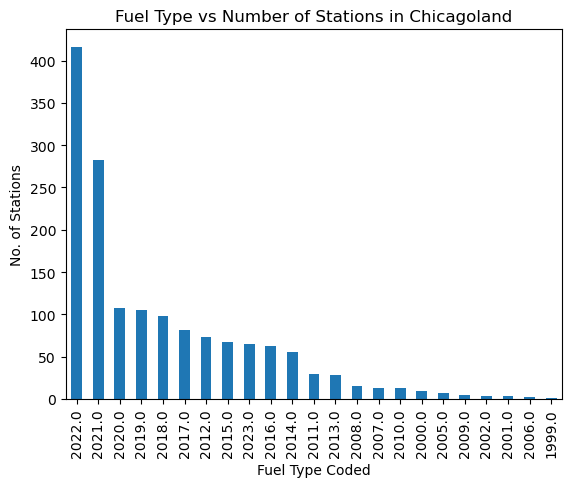

In [148]:
data_year.plot(kind = 'bar')
plt.xlabel("Fuel Type Coded")
plt.ylabel("No. of Stations")
plt.title("Fuel Type vs Number of Stations in Chicagoland")
data_year.show()